# Factors which predict future user adoption

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from datetime import datetime, timedelta
from __future__ import division

import warnings
warnings.filterwarnings('ignore')

In [2]:
sns.set_style('darkgrid')

### Load data into dataframes

In [3]:
users_df = pd.read_csv('takehome_users.csv', 
                       encoding='cp437',
                       parse_dates=[1,5],
                       header=0,
                       infer_datetime_format =True
                      )
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1398138810,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1396237504,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1363734892,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1369210168,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1358849660,0,0,193,5240.0


#### convert last_session_creation_time from unix timestamp to datetime

In [4]:
users_df['last_session_creation_time']=(pd.to_datetime(users_df['last_session_creation_time'],unit='s'))
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0


#### check for na / inf values

In [5]:
users_df[users_df.isna().any(axis=1)]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
6,7,2012-12-16 13:24:32,Sewell Tyler,TylerSewell@jourrapide.com,SIGNUP,2012-12-20 13:24:32,0,1,37,NaN
7,8,2013-07-31 05:34:02,Hamilton Danielle,DanielleHamilton@yahoo.com,PERSONAL_PROJECTS,NaT,1,1,74,NaN
8,9,2013-11-05 04:04:24,Amsel Paul,PaulAmsel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,302,NaN
10,11,2013-12-26 03:55:54,Paulsen Malthe,MaltheAPaulsen@gustr.com,SIGNUP,2013-12-27 03:55:54,0,0,69,NaN
11,12,2014-04-17 23:48:38,Mathiesen Lµrke,LaerkeLMathiesen@cuvox.de,ORG_INVITE,NaT,0,0,130,9270.0
13,14,2012-10-11 16:14:33,Rivera Bret,BretKRivera@gmail.com,SIGNUP,2012-10-12 16:14:33,0,0,0,NaN
14,15,2013-07-16 21:33:54,Theiss Ralf,RalfTheiss@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,175,NaN
15,16,2013-02-11 10:09:50,Engel RenΘ,ReneEngel@hotmail.com,PERSONAL_PROJECTS,NaT,0,0,211,NaN
17,18,2013-08-24 00:26:46,Gregersen Celina,CelinaAGregersen@jourrapide.com,GUEST_INVITE,NaT,0,0,2,3153.0
18,19,2013-05-24 14:56:36,Collins Arlene,ArleneRCollins@gmail.com,SIGNUP,2013-05-30 14:56:36,1,0,0,NaN


#### read user engagement data

In [6]:
eng_df = pd.read_csv('takehome_user_engagement.csv', 
                       encoding='cp437',
                       parse_dates=[0],
                       header=0,
                       infer_datetime_format =True,
                       index_col=0
                      )
eng_df.head()

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1


In [7]:
eng_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 207917 entries, 2014-04-22 03:53:30 to 2014-01-26 08:57:12
Data columns (total 2 columns):
user_id    207917 non-null int64
visited    207917 non-null int64
dtypes: int64(2)
memory usage: 4.8 MB


#### Adopted user
an "adopted user" is a user who has logged into the product on three separate days in at least one sevenday period , identify which factors predict future user adoption.

In [8]:
def count_days_in_grp(group):
    """ takes a group of records (grouped by week for a user) 
    and returns number of separate days """
    group = group.resample('1D').sum()
    return len(group)

def is_adopted_user(user_id):
    """ checks if user is adopted """
    user_logins = eng_df[eng_df['user_id'] == user_id].sort_index()
    user_logins = user_logins.resample('1W').apply(count_days_in_grp)
    is_adopted = (user_logins['user_id'] >= 3).any()
    return 1 if is_adopted else 0

In [9]:
users_df['adopted_user'] = users_df.apply(lambda x: is_adopted_user(x['object_id']), axis=1)
users_df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0


### Feature Engineering

#### index users dataframe by user_id (object_id)

In [10]:
users_df = users_df.set_index('object_id')

#### is_invited (1 if invited_by_user_id is not NaN else 0)

In [11]:
def is_invited(invited_by):
    if np.isnan(invited_by):
        return 0
    else:
        return 1

In [12]:
users_df['is_invited'] = users_df.apply(lambda x: is_invited(x['invited_by_user_id']), axis=1)
users_df.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,is_invited
object_id,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,1
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,1
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,1
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,1


#### total logins by user

In [13]:
logins_by_user = eng_df.reset_index(level='time_stamp', drop=True).groupby(by='user_id').count()
users_df = users_df.merge(logins_by_user, left_index=True, right_index=True, how='left').\
            rename({'visited':'total_logins'}, axis='columns')
users_df.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,is_invited,total_logins
object_id,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,1,1.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,1,14.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,1,1.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1,1.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,1,1.0


#### number of weekend logins

In [14]:
weekend_logins = eng_df.reset_index(level='time_stamp')
weekend_logins = weekend_logins[weekend_logins['time_stamp'].dt.day > 4]
weekend_logins = weekend_logins.drop(['time_stamp'], axis='columns').groupby(by='user_id').count()
users_df = users_df.merge(weekend_logins, left_index=True, right_index=True, how='left').\
            rename({'visited':'weekend_logins'}, axis='columns')
users_df.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,is_invited,total_logins,weekend_logins
object_id,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,1,1.0,1.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,1,14.0,13.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,1,1.0,1.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1,1.0,1.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,1,1.0,1.0


#### number of days on which user is active

In [15]:
active_days_by_user = eng_df.groupby(['user_id', pd.TimeGrouper('1D')]).sum()
active_days_by_user = active_days_by_user.reset_index(level='time_stamp', drop=True).groupby('user_id').count()
users_df = users_df.merge(active_days_by_user, left_index=True, right_index=True, how='left').\
            rename({'visited':'active_days'}, axis='columns')
users_df.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,is_invited,total_logins,weekend_logins,active_days
object_id,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,1,1.0,1.0,1.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,1,14.0,13.0,14.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,1,1.0,1.0,1.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1,1.0,1.0,1.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,1,1.0,1.0,1.0


#### % of total days since creation that the user is active (days with logins)

In [16]:
def pct_active(last_session_time, active_days, creation_time):
    if not last_session_time or not active_days:#  or np.isnan(last_session_time) or np.isnat(last_session_time):
        return np.nan
    elif last_session_time - creation_time == timedelta(0):
        return 0
    else:
        return active_days / (last_session_time - creation_time).days

In [17]:
users_df['pct_active'] = users_df.apply(lambda x: pct_active(x['last_session_creation_time'], 
                                                             x['active_days'], x['creation_time']), axis=1)
users_df.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,is_invited,total_logins,weekend_logins,active_days,pct_active
object_id,,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,1,1.0,1.0,1.0,0.000000
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,1,14.0,13.0,14.0,0.102941
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,1,1.0,1.0,1.0,0.000000
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,1,1.0,1.0,1.0,1.000000
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,1,1.0,1.0,1.0,0.200000


In [18]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 15 columns):
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted_user                  12000 non-null int64
is_invited                    12000 non-null int64
total_logins                  8823 non-null float64
weekend_logins                7988 non-null float64
active_days                   8823 non-null float64
pct_active                    8823 non-null float64
dtypes: datetime64[ns](2), float64(5), int64(5), object(3)
memory usage: 1.5+ MB


### frequency domain feature extraction
this code is adapted from the wonderful example explained by [Ahmet Taspinar](http://ataspinar.com/2018/04/04/machine-learning-with-signal-processing-techniques/)<br>
detect_peaks.py is attributed to [Marcos Duarte](https://github.com/demotu/BMC)

In [19]:
from detect_peaks import detect_peaks
from scipy.signal import welch
from scipy.fftpack import fft
from collections import defaultdict
 
def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)
    fft_values_ = fft(y_values)
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])
    return f_values, fft_values
 
def get_psd_values(y_values, T, N, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    return f_values, psd_values

def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]

def get_autocorr_values(y_values, T, N, f_s):
    autocorr_values = autocorr(y_values)
    x_values = np.array([T * jj for jj in range(0, N)])
    return x_values, autocorr_values

def get_first_n_peaks(x,y,no_peaks=5):
    x_, y_ = list(x), list(y)
    if len(x_) >= no_peaks:
        return x_[:no_peaks], y_[:no_peaks]
    else:
        missing_no_peaks = no_peaks-len(x_)
        return x_ + [0]*missing_no_peaks, y_ + [0]*missing_no_peaks
    
def get_features(x_values, y_values, mph, num_peaks):
    indices_peaks = detect_peaks(y_values, mph=mph)
    peaks_x, peaks_y = get_first_n_peaks(x_values[indices_peaks], y_values[indices_peaks], no_peaks=num_peaks)
    return peaks_x + peaks_y

def extract_features_labels(df, f_s, denominator):
    """ df is the user engagements grouped by user """
    percentile = 0
    num_peaks=5
    list_of_features = defaultdict(dict)
    # loop over users
    for signal_grp in df:
        features_dict = defaultdict(list)
        
        user_id = signal_grp[0]
        signal = signal_grp[1].set_index('time_stamp').resample('1D').count()
        time_values = signal.index.values
        t_n = (time_values[-1] - time_values[0])/np.timedelta64(1, 's')
        signal = signal.values.reshape(-1)

        signal_min = np.percentile(signal, percentile)
        signal_max = np.percentile(signal, 100-percentile)
        mph = signal_min + (signal_max - signal_min)/denominator
        N = len(signal)
        T = t_n / N
        features = get_features(*get_psd_values(signal, T, N, f_s), mph, num_peaks)
        features_dict['psd_freq'] = []
        features_dict['psd_val'] = []
        features_dict['fft_freq'] = []
        features_dict['fft_val'] = []
        features_dict['ac_freq'] = []
        features_dict['ac_val'] = []
        for i in range(num_peaks):
            features_dict['psd_freq'].append(features[i])
            features_dict['psd_val'].append(features[i+num_peaks])
        features = get_features(*get_fft_values(signal, T, N, f_s), mph, num_peaks)
        for i in range(num_peaks):
            features_dict['fft_freq'].append(features[i])
            features_dict['fft_val'].append(features[i+num_peaks])
        features = get_features(*get_autocorr_values(signal, T, N, f_s), mph, num_peaks)
        for i in range(num_peaks):
            features_dict['ac_freq'].append(features[i])
            features_dict['ac_val'].append(features[i+num_peaks])
        list_of_features[user_id] = features_dict
    return list_of_features

In [20]:
f_s = 1/(24*60*60)
denominator = 10
eng_features = extract_features_labels(eng_df.reset_index('time_stamp').groupby('user_id'), f_s, denominator)

In [21]:
user_ids = []
labels = []

for user_id, d in eng_features.items():
    user_ids.append(user_id)
    labels.append(pd.DataFrame.from_dict(d, orient='index'))

freq_feat_df = pd.concat(labels, keys=user_ids)
freq_feat_df.head(10)

0             1             2             3  \
1 psd_freq  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
  psd_val   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
  fft_freq  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
  fft_val   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
  ac_freq   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
  ac_val    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
2 psd_freq  1.356337e-07  2.712674e-07  4.069010e-07  5.877459e-07   
  psd_val   1.094790e+05  1.376965e+04  1.118846e+04  1.091642e+04   
  fft_freq  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
  fft_val   0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   

                       4  
1 psd_freq  0.000000e+00  
  psd_val   0.000000e+00  
  fft_freq  0.000000e+00  
  fft_val   0.000000e+00  
  ac_freq   0.000000e+00  
  ac_val    0.000000e+00  
2 psd_freq  7.233796e-07  
  psd_val   6.224658e+04  
  fft_freq  0.000000e+00  
  fft_val   0.000000e+00

In [22]:
freq_feat_df = freq_feat_df.unstack(level=-1)
freq_feat_df.head(5)

0                                                        \
       psd_freq        psd_val fft_freq fft_val        ac_freq ac_val   
1  0.000000e+00       0.000000      0.0     0.0       0.000000    0.0   
2  1.356337e-07  109479.020112      0.0     0.0  343077.372263    4.0   
3  0.000000e+00       0.000000      0.0     0.0       0.000000    0.0   
4  0.000000e+00       0.000000      0.0     0.0       0.000000    0.0   
5  0.000000e+00       0.000000      0.0     0.0       0.000000    0.0   

              1                                 ...          3          \
       psd_freq       psd_val fft_freq fft_val  ...   fft_freq fft_val   
1  0.000000e+00      0.000000      0.0     0.0  ...        0.0     0.0   
2  2.712674e-07  13769.649559      0.0     0.0  ...        0.0     0.0   
3  0.000000e+00      0.000000      0.0     0.0  ...        0.0     0.0   
4  0.000000e+00      0.000000      0.0     0.0  ...        0.0     0.0   
5  0.000000e+00      0.000000      0.0     0.0  ...        0.0     0.0   

                                   4                                 \
        ac_freq ac_val      psd_freq       psd_val fft_freq fft_val   
1  0.000000e+00    0.0  0.000000e+00      0.000000      0.0     0.0   
2  1.200771e+06    4.0  7.233796e-07  62246.577199      0.0     0.0   
3  0.000000e+00    0.0  0.000000e+00      0.000000      0.0     0.0   
4  0.000000e+00    0.0  0.000000e+00      0.000000      0.0     0.0   
5  0.000000e+00    0.0  0.000000e+00      0.000000      0.0     0.0   

                        
        ac_freq ac_val  
1  0.000000e+00    0.0  
2  1.372309e+06    2.0  
3  0.000000e+00    0.0  
4  0.000000e+00    0.0  
5  0.000000e+00    0.0  

[5 rows x 30 columns]

In [23]:
freq_feat_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 1 to 12000
Data columns (total 30 columns):
(0, psd_freq)    8823 non-null float64
(0, psd_val)     8823 non-null float64
(0, fft_freq)    8823 non-null float64
(0, fft_val)     8823 non-null float64
(0, ac_freq)     8823 non-null float64
(0, ac_val)      8823 non-null float64
(1, psd_freq)    8823 non-null float64
(1, psd_val)     8823 non-null float64
(1, fft_freq)    8823 non-null float64
(1, fft_val)     8823 non-null float64
(1, ac_freq)     8823 non-null float64
(1, ac_val)      8823 non-null float64
(2, psd_freq)    8823 non-null float64
(2, psd_val)     8823 non-null float64
(2, fft_freq)    8823 non-null float64
(2, fft_val)     8823 non-null float64
(2, ac_freq)     8823 non-null float64
(2, ac_val)      8823 non-null float64
(3, psd_freq)    8823 non-null float64
(3, psd_val)     8823 non-null float64
(3, fft_freq)    8823 non-null float64
(3, fft_val)     8823 non-null float64
(3, ac_freq)     8823 non-null flo

#### add frequency domain features to users_df

In [24]:
#num_freq_features = len(eng_features[1])
#num_users = len(users_df)
#freq_feat_df = pd.DataFrame.from_dict(eng_features, orient='index',
#                                      columns=['freq_'+str(i) for i in range(num_freq_features)])

users_df = users_df.merge(freq_feat_df, left_index=True, right_index=True, how='left')
users_df.head()

,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,adopted_user,...,"(3, fft_freq)","(3, fft_val)","(3, ac_freq)","(3, ac_val)","(4, psd_freq)","(4, psd_val)","(4, fft_freq)","(4, fft_val)","(4, ac_freq)","(4, ac_val)"
object_id,,,,,,,,,,,,,,,,,,,,,
1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,0,...,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.0
2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,1,...,0.0,0.0,1.200771e+06,4.0,7.233796e-07,62246.577199,0.0,0.0,1.372309e+06,2.0
3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,0,...,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.0
4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,0,...,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.0
5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,0,...,0.0,0.0,0.000000e+00,0.0,0.000000e+00,0.000000,0.0,0.0,0.000000e+00,0.0


#### drop columns which are no longer useful for analysis or prediction (email, name, creation_time etc), replace na values

In [25]:
users_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 45 columns):
creation_time                 12000 non-null datetime64[ns]
name                          12000 non-null object
email                         12000 non-null object
creation_source               12000 non-null object
last_session_creation_time    8823 non-null datetime64[ns]
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
invited_by_user_id            6417 non-null float64
adopted_user                  12000 non-null int64
is_invited                    12000 non-null int64
total_logins                  8823 non-null float64
weekend_logins                7988 non-null float64
active_days                   8823 non-null float64
pct_active                    8823 non-null float64
(0, psd_freq)                 8823 non-null float64
(0, psd_val)                  8823 non-null float

In [26]:
users_df_cln = users_df.\
                drop(['email', 'name','creation_time', 'last_session_creation_time', 'invited_by_user_id'], axis='columns')
na_value_map1 = {'total_logins':0, 'weekend_logins':0, 'active_days':0, 'pct_active':0}
freq_cols = ['psd_freq', 'psd_val', 'fft_freq', 'fft_val', 'ac_freq', 'ac_val']
num_feature_sets = 5
na_value_map2 = {(i, col):0 for col in freq_cols for i in range(num_feature_sets)}
users_df_cln = users_df_cln.fillna(value=na_value_map1).fillna(value=na_value_map2)                
users_df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 40 columns):
creation_source               12000 non-null object
opted_in_to_mailing_list      12000 non-null int64
enabled_for_marketing_drip    12000 non-null int64
org_id                        12000 non-null int64
adopted_user                  12000 non-null int64
is_invited                    12000 non-null int64
total_logins                  12000 non-null float64
weekend_logins                12000 non-null float64
active_days                   12000 non-null float64
pct_active                    12000 non-null float64
(0, psd_freq)                 12000 non-null float64
(0, psd_val)                  12000 non-null float64
(0, fft_freq)                 12000 non-null float64
(0, fft_val)                  12000 non-null float64
(0, ac_freq)                  12000 non-null float64
(0, ac_val)                   12000 non-null float64
(1, psd_freq)                 12000 non-null float64
(

In [27]:
def make_categorical(df, columns):
    for column in columns:
        df[column] = df[column].astype('category')
    return df

In [28]:
users_df_cln = make_categorical(users_df_cln,
                 ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'org_id', 'is_invited'])
users_df_cln.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 1 to 12000
Data columns (total 40 columns):
creation_source               12000 non-null category
opted_in_to_mailing_list      12000 non-null category
enabled_for_marketing_drip    12000 non-null category
org_id                        12000 non-null category
adopted_user                  12000 non-null int64
is_invited                    12000 non-null category
total_logins                  12000 non-null float64
weekend_logins                12000 non-null float64
active_days                   12000 non-null float64
pct_active                    12000 non-null float64
(0, psd_freq)                 12000 non-null float64
(0, psd_val)                  12000 non-null float64
(0, fft_freq)                 12000 non-null float64
(0, fft_val)                  12000 non-null float64
(0, ac_freq)                  12000 non-null float64
(0, ac_val)                   12000 non-null float64
(1, psd_freq)                 12000 non-

In [29]:
users_df_cln.describe()

,adopted_user,total_logins,weekend_logins,active_days,pct_active,"(0, psd_freq)","(0, psd_val)","(0, fft_freq)","(0, fft_val)","(0, ac_freq)",...,"(3, fft_freq)","(3, fft_val)","(3, ac_freq)","(3, ac_val)","(4, psd_freq)","(4, psd_val)","(4, fft_freq)","(4, fft_val)","(4, ac_freq)","(4, ac_val)"
count,12000.000000,12000.000000,12000.000000,12000.000000,12000.000000,1.200000e+04,12000.000000,1.200000e+04,12000.000000,1.200000e+04,...,1.200000e+04,12000.000000,1.200000e+04,12000.000000,1.200000e+04,12000.000000,1.200000e+04,12000.000000,1.200000e+04,12000.000000
mean,0.155500,17.326417,15.022583,17.326417,0.243178,1.273314e-07,18295.215581,2.134785e-07,0.023964,1.046000e+05,...,2.197469e-07,0.007196,2.065530e+05,19.708333,1.935311e-07,10808.935127,1.527369e-07,0.004495,2.521591e+05,19.501500
std,0.362396,64.287839,55.774237,64.287839,0.348191,5.817653e-07,49923.247499,9.953592e-07,0.061589,3.231869e+05,...,1.034380e-06,0.030040,5.288740e+05,92.930314,5.827335e-07,31633.350233,8.682916e-07,0.023605,6.432644e+05,92.348444
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
50%,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
75%,0.000000,1.000000,1.000000,1.000000,0.378500,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,...,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000
max,1.000000,606.000000,530.000000,606.000000,2.000000,4.997896e-06,687814.994329,1.139323e-05,0.528752,7.777858e+06,...,1.147842e-05,0.254579,7.085829e+06,1086.000000,5.555556e-06,340489.387633,1.054679e-05,0.251508,1.063652e+07,1086.000000


In [30]:
users_df_cln.describe(include='category')

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,is_invited
count,12000,12000,12000,12000,12000
unique,5,2,2,417,2
top,ORG_INVITE,0,0,0,1
freq,4254,9006,10208,319,6417


### EDA

In [31]:
users_adopted = users_df_cln[users_df_cln['adopted_user'] == 1]
users_notadopted = users_df_cln[users_df_cln['adopted_user'] == 0]

In [32]:
def make_boxplot(col):
    fig, ax= plt.subplots(figsize=(15, 5))
    ax.boxplot(x=[users_adopted[col], users_notadopted[col]], vert=False)
    ax.set_xlabel(col)
    ax.set_yticklabels(['adopted', 'not adopted'])
    plt.show()  

In [33]:
def make_countplot(col):
    num_vals = users_df_cln[col].unique().shape[0]
    fig, ax= plt.subplots(figsize=(15, 2*num_vals))
    sns.countplot(y=col, hue="adopted_user", 
            palette="pastel", edgecolor=".6",
            data=users_df_cln, ax=ax)

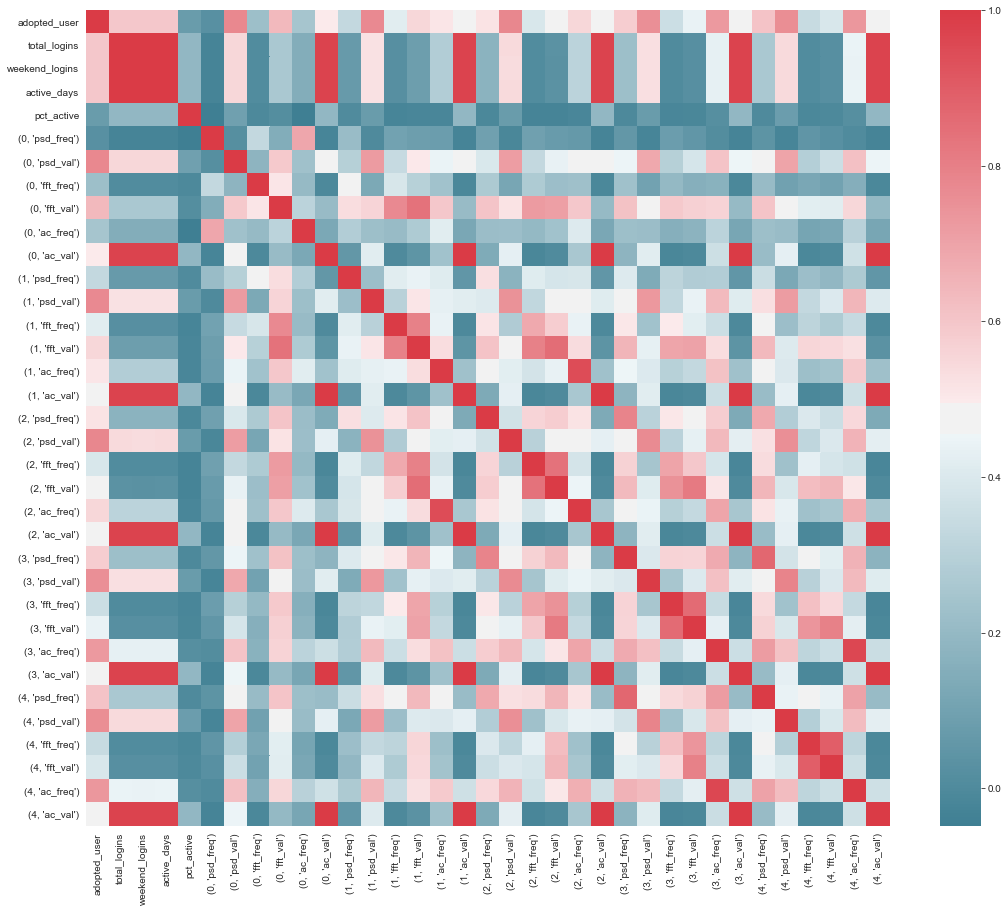

In [34]:
corr =  users_df_cln.corr()
fig, ax = plt.subplots(figsize=(18,15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, ax=ax)

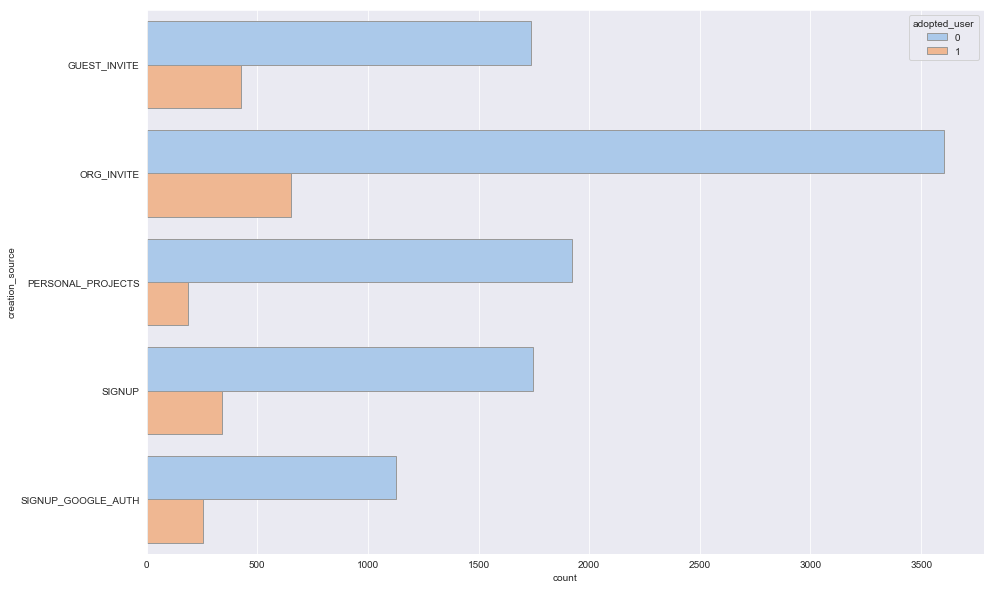

In [36]:
make_countplot('creation_source')

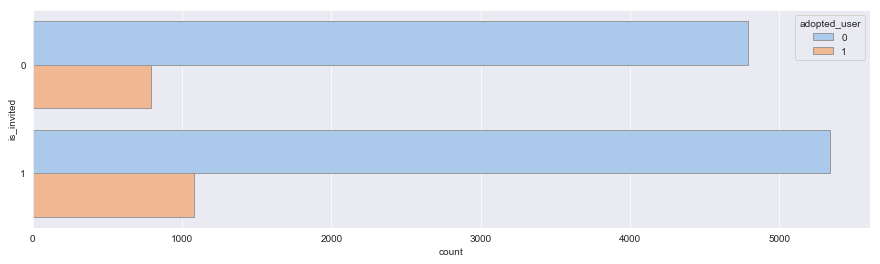

In [37]:
make_countplot('is_invited')

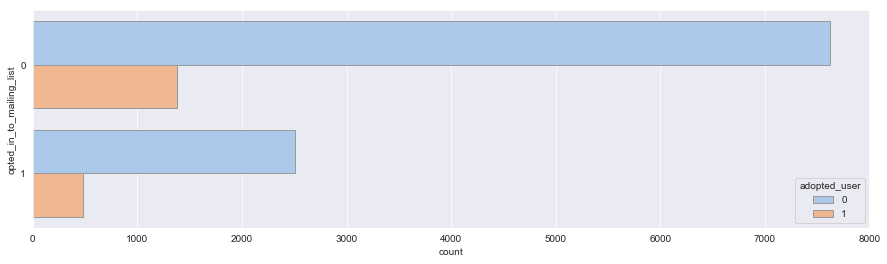

In [38]:
make_countplot('opted_in_to_mailing_list')

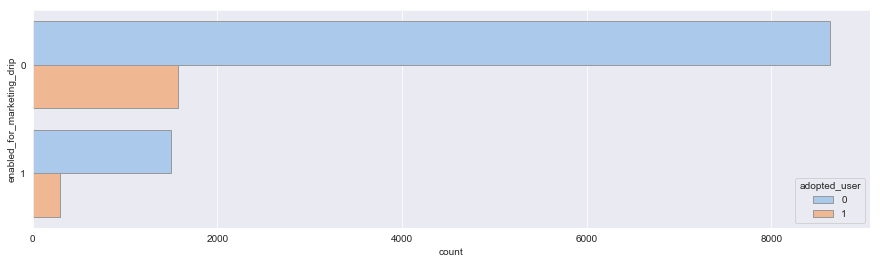

In [39]:
make_countplot('enabled_for_marketing_drip')

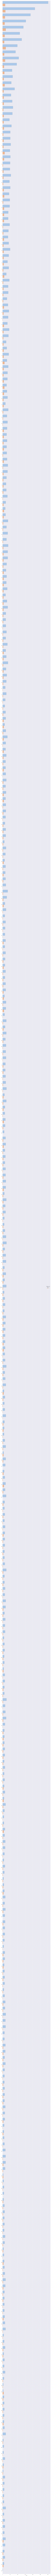

In [40]:
make_countplot('org_id')

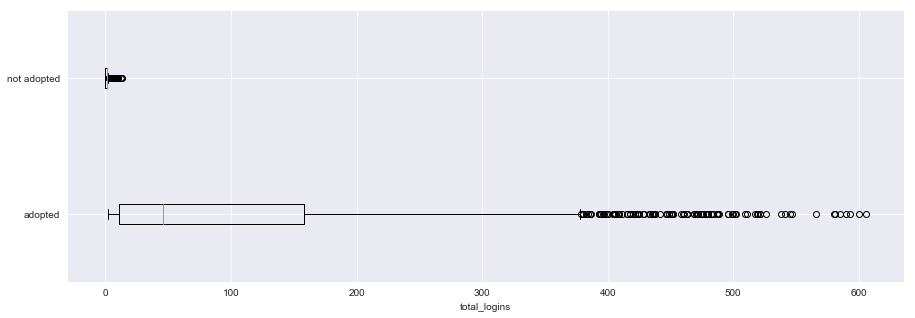

In [41]:
make_boxplot('total_logins')

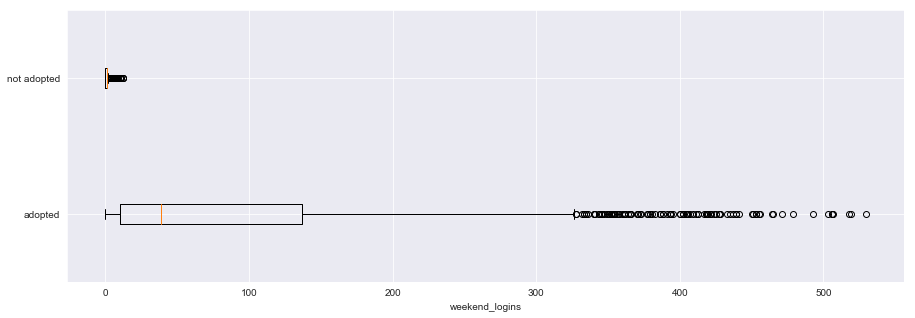

In [42]:
make_boxplot('weekend_logins')

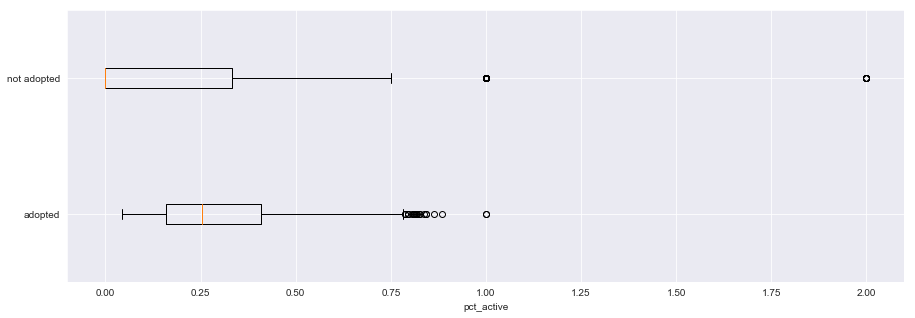

In [43]:
make_boxplot('pct_active')

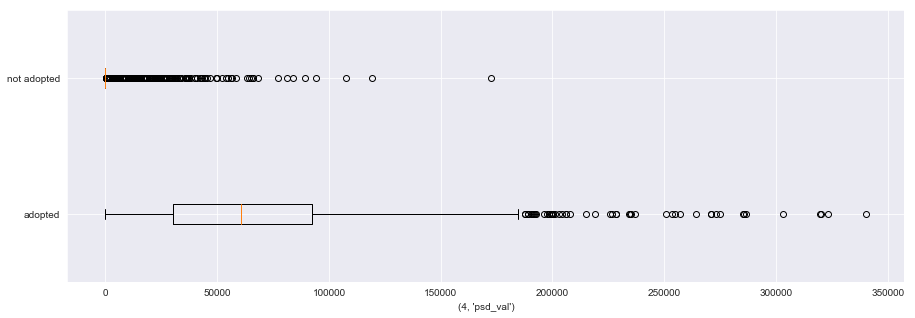

In [42]:
make_boxplot((4, 'psd_val'))

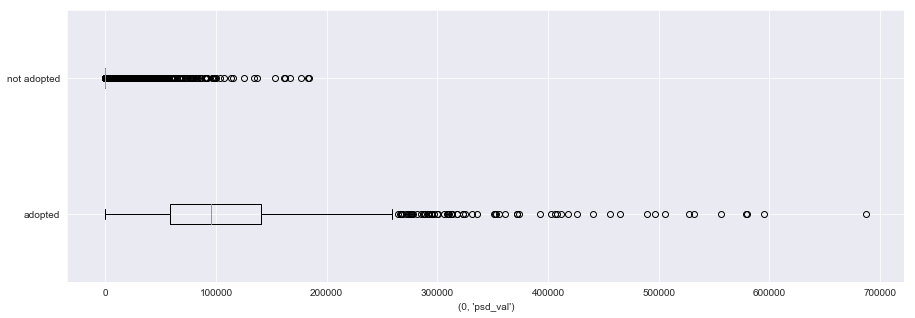

In [43]:
make_boxplot((0, 'psd_val'))

# Findings:

### The plots above (especially the correlation heatmap and the boxplots) indicate that the following features have a significant say in whether the user is adopted or not:

### 1. Users with higher number of logins are adopted more

### 2. Users with higher number of weekend logins are adopted more

### 3. Users with higher number of active days since account creation are adopted more

### 4. Users with organization or guest invites are adopted more than others. However of the very large number of organization invites only a small proportion are adopted. Users with guest invites tend to have a higher proportion of adoption within that group

### 5. Users belonging to organizations with ids 4, 7 and 9 have a higher proportion of adoption within their organizations.

### 6. Users who have opted in for email are adopted more than those who have not

### 7. Users who have not been enabled for marketing drip are adopted more than those who are

### 8. The frequency domain features derived from power spectral density (PSD) of the users' daily login patterns have a high correlation with whether the user is adopted or not. PSD captures the strength of the variations in user logins (number of times a user logs into the system) as a function of frequency (daily, weekly, monthly and yearly). From this we can conclude that users who keep coming back periodically (daily/ weekly / monthly etc) to log into the system have a higher probability of continuing to do so and becoming an adopted user. (This of course makes sense intuitively as well that a user who is tending to log in with a certain periodicity is interested in the system)